In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # OPTIONAL only for heatmap styling
import os
import ast
import re
from collections import Counter
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [5]:
df = pd.read_csv("../data/processed/lamudi_final_clean.csv")  

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1000, 14)


,id,title,price,address,num_of_bedrooms,num_of_bathrooms,floor_area,description,list_of_amenities,image_urls,property_url,local_images,city,full_text
0,1,1BEDROOM CONDO UNIT FOR SALE AT GOLD RESIDENCE...,6973985.0,"Ninoy Aquino Avenue, Brgy. Sto. Niño, Parañaqu...",1.0,1.0,25.0,"GOLD RESIDENCES!!! Across NAIA Terminal 1, Par...","cctv, utility room, air conditioning, alarm sy...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/projects/gold-reside...,"['A1.1.jpg', 'A1.2.jpg', 'A1.3.jpg', 'A1.4.jpg...",Parañaque,bedroom condo unit for sale gold residences ac...
1,2,"1 Bedroom w/ balcony For Sale Le Pont Tower 2,...",14829797.0,"Bridgetowne East, Eulogio Amang Rodriguez Ave....",1.0,1.0,45.0,LE PONT RESIDENCES TOWER 2 Completion Date: Se...,"cctv, air conditioning, alarm system, billiard...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/metro-manila/pas...,"['A2.1.jpg', 'A2.2.jpg', 'A2.3.jpg', 'A2.4.jpg...",Pasig,bedroom balcony for sale pont tower bridgetown...
2,3,Operational Resort for Sale | OR01 | San Narci...,60000000.0,"Alusiis, San Narciso",0.0,0.0,0.0,Take over this income-generating resort in a 1...,"air conditioning, alarm system, cctv, driver's...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/zambales/san-nar...,"['A3.1.jpg', 'A3.2.jpg', 'A3.3.jpg', 'A3.4.jpg...",San Narciso,operational resort for sale or san narciso zam...
3,4,1 Bedroom Loft-Type Condo For Sale in Bellagio...,15000000.0,"Fort Bonifacio, Taguig",1.0,2.0,58.0,UNIT DESCRIPTION: 1 Bedroom 2 Toilet and Bath ...,"gymnasium, air conditioning, alarm system, ele...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/projects/the-bellagi...,"['A4.1.jpg', 'A4.2.jpg', 'A4.3.jpg', 'A4.4.jpg...",Taguig,bedroom loft type condo for sale bellagio tagu...
4,5,For Sale 2 Bedroom Rent to Own Condo in Floren...,16920000.0,"Florence Way, 1634 Taguig City, Philippines\n ...",2.0,3.0,79.0,THE FLORENCE RESIDENCES READY FOR OCCUPANCY | ...,"gymnasium, cctv, utility room, indoor pool, ai...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/metro-manila/tag...,"['A5.1.jpg', 'A5.2.jpg', 'A5.3.jpg', 'A5.4.jpg...",Taguig,for sale bedroom rent own condo florence mckin...


In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   title              982 non-null    object 
 2   price              1000 non-null   float64
 3   address            982 non-null    object 
 4   num_of_bedrooms    1000 non-null   float64
 5   num_of_bathrooms   1000 non-null   float64
 6   floor_area         1000 non-null   float64
 7   description        991 non-null    object 
 8   list_of_amenities  972 non-null    object 
 9   image_urls         1000 non-null   object 
 10  property_url       1000 non-null   object 
 11  local_images       1000 non-null   object 
 12  city               978 non-null    object 
 13  full_text          1000 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


,id,title,price,address,num_of_bedrooms,num_of_bathrooms,floor_area,description,list_of_amenities,image_urls,property_url,local_images,city,full_text
count,1000.000000,982,1.000000e+03,982,1000.000000,1000.000000,1000.000000,991,972,1000,1000,1000,978,1000
unique,NaN,825,NaN,188,NaN,NaN,NaN,321,241,483,851,987,60,373
top,NaN,2 Bedroom Condo for Sale in The Residences At ...,NaN,"Tugbok, Davao",NaN,NaN,NaN,TANGLAW 2-Storey Single Attached House 3 Bedro...,"gym, lounge, carport, swimming pool, function ...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/new-developments/par...,[],Davao,unit model tanglaw for sale house lot tugbok d...
freq,NaN,3,NaN,256,NaN,NaN,NaN,139,256,25,2,14,257,139
mean,500.500000,NaN,1.160856e+07,NaN,0.762000,3.034000,82.104000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,1.543680e+07,NaN,0.848573,20.924691,95.541862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000e+00,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,4.800000e+06,NaN,0.000000,1.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,500.500000,NaN,6.806380e+06,NaN,1.000000,2.000000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,750.250000,NaN,1.141204e+07,NaN,1.000000,3.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


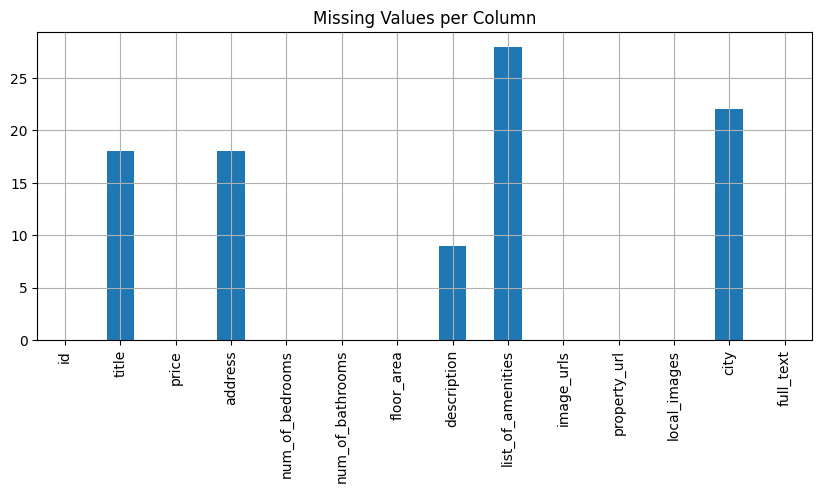

In [8]:
df.isna().sum()

plt.figure(figsize=(10, 4))
df.isna().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.show()

In [9]:
numeric_cols = ["price", "num_of_bedrooms", "num_of_bathrooms", "floor_area"]

df[numeric_cols].describe()


,price,num_of_bedrooms,num_of_bathrooms,floor_area
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.160856e+07,0.762000,3.034000,82.104000
std,1.543680e+07,0.848573,20.924691,95.541862
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.800000e+06,0.000000,1.000000,36.000000
50%,6.806380e+06,1.000000,2.000000,67.000000
75%,1.141204e+07,1.000000,3.000000,80.000000
max,2.090000e+08,5.000000,633.000000,1100.000000


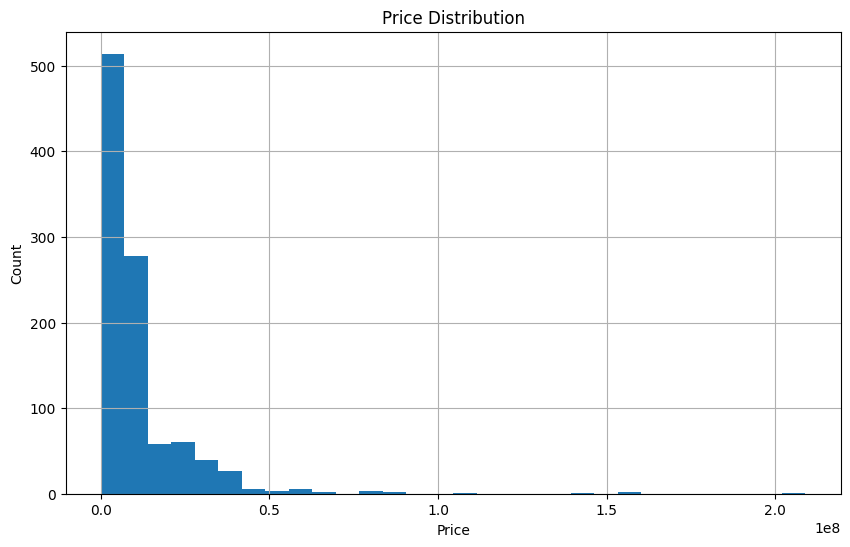

In [10]:
plt.hist(df['price'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


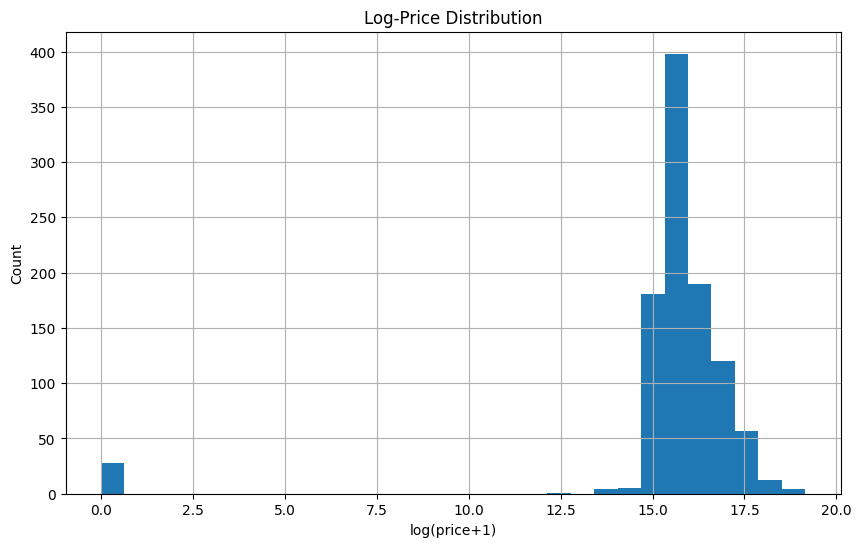

In [11]:
df['log_price'] = np.log1p(df['price'])

plt.hist(df['log_price'], bins=30)
plt.title("Log-Price Distribution")
plt.xlabel("log(price+1)")
plt.ylabel("Count")
plt.show()


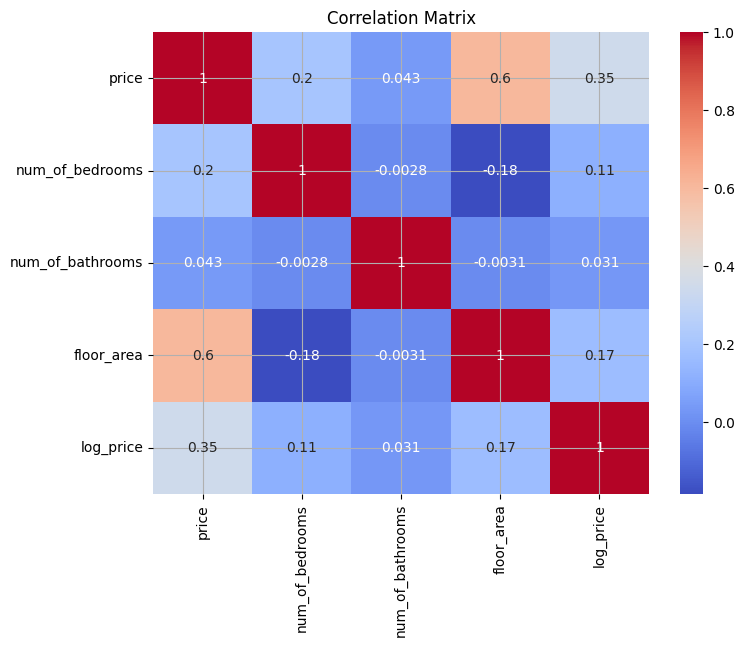

In [12]:
corr = df[numeric_cols + ['log_price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")  # seaborn is allowed for heatmap only
plt.title("Correlation Matrix")
plt.show()


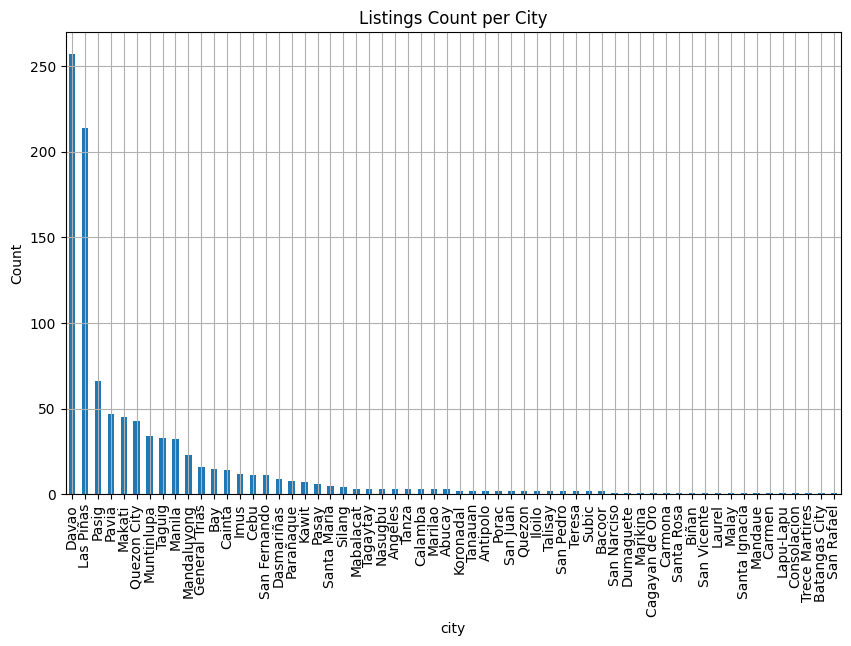

In [13]:
df['city'].value_counts()

df['city'].value_counts().plot(kind='bar')
plt.title("Listings Count per City")
plt.ylabel("Count")
plt.show()


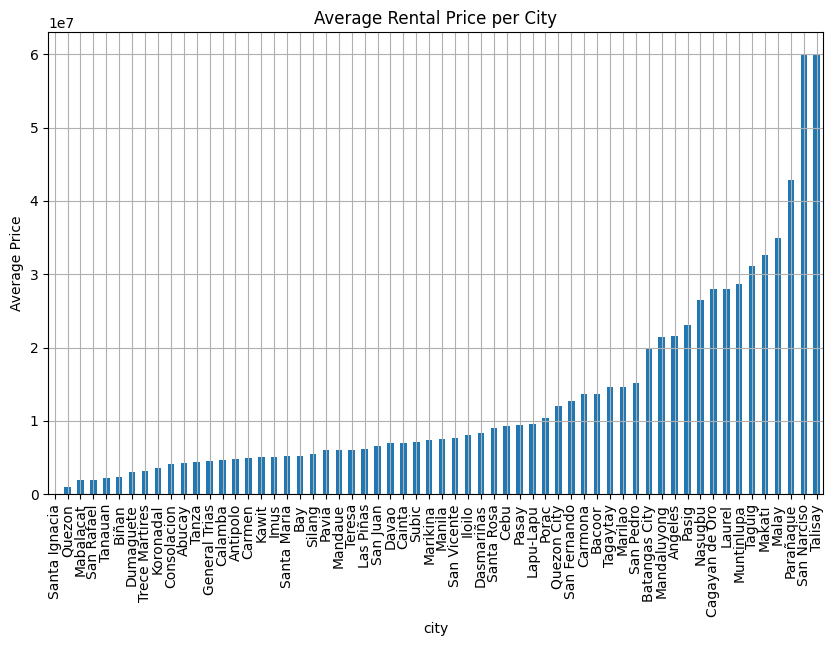

In [14]:
city_price = df.groupby('city')['price'].mean().sort_values()

city_price.plot(kind='bar')
plt.title("Average Rental Price per City")
plt.ylabel("Average Price")
plt.show()


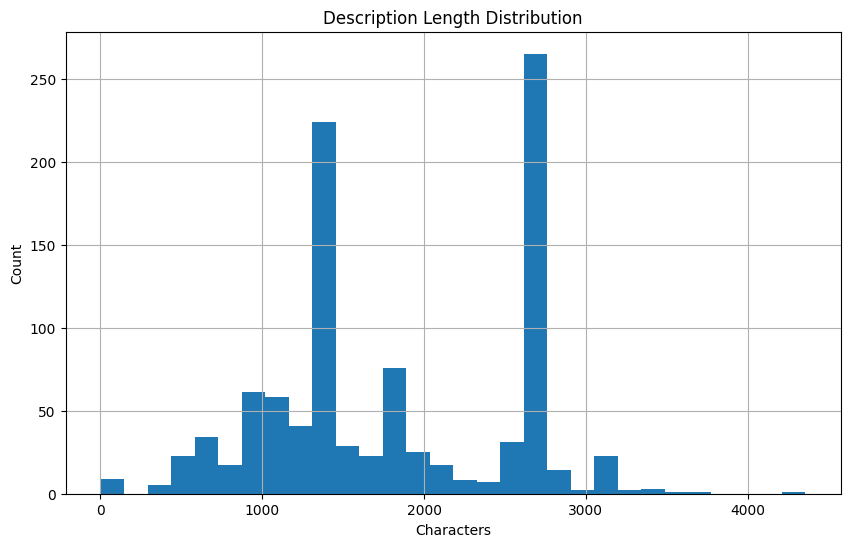

In [15]:
df['title_length'] = df['title'].astype(str).apply(len)
df['description_length'] = df['description'].astype(str).apply(len)

plt.hist(df['description_length'], bins=30)
plt.title("Description Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


In [16]:
import ast
import re

def parse_amenities(s):
    if pd.isna(s):
        return []
    s = str(s).strip()
    # Try literal list
    try:
        val = ast.literal_eval(s)
        if isinstance(val, (list, tuple, set)):
            return [str(x).strip().lower() for x in val]
    except:
        pass

    # Otherwise split manually
    s = s.strip("[]()")
    parts = re.split(r'[,\|;/]+', s)
    
    cleaned = []
    for p in parts:
        p = p.strip().strip("\"'").lower()
        if p:
            cleaned.append(p)

    return cleaned

df['amenities_parsed'] = df['list_of_amenities'].apply(parse_amenities)


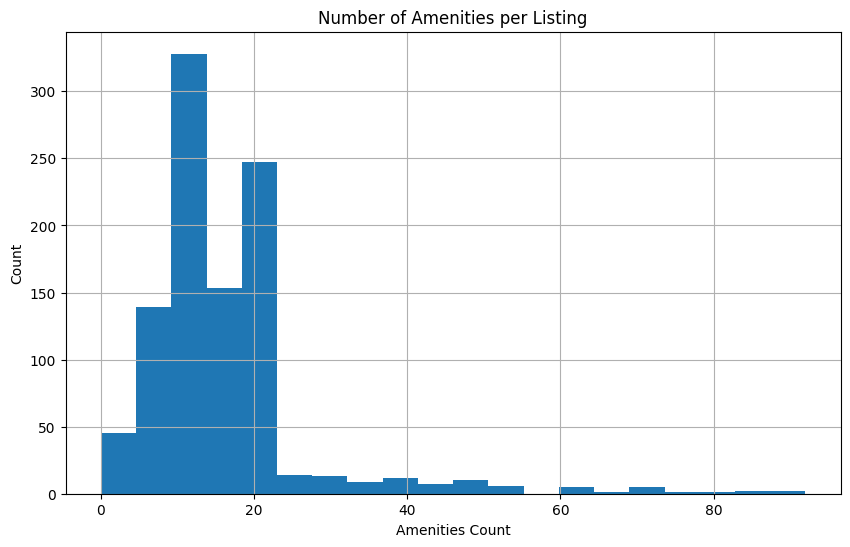

In [17]:
df['amenity_count'] = df['amenities_parsed'].apply(len)

plt.hist(df['amenity_count'], bins=20)
plt.title("Number of Amenities per Listing")
plt.xlabel("Amenities Count")
plt.ylabel("Count")
plt.show()


In [18]:
all_amen = Counter()
for row in df['amenities_parsed']:
    all_amen.update(row)

amenity_df = pd.DataFrame(all_amen.most_common(20), columns=['amenity', 'count'])
amenity_df


,amenity,count
0,swimming pool,895
1,24-hour security,834
2,playground,688
3,basketball court,684
4,clubhouse,678
5,gym,676
6,function area,584
7,cctv,503
8,fire alarm,494
9,fire exits,492


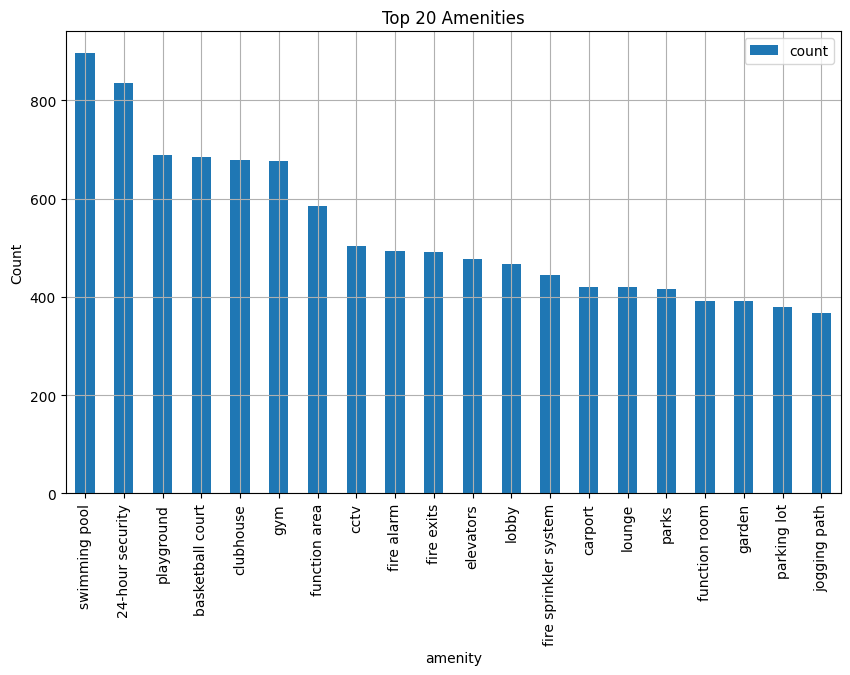

In [19]:
amenity_df.set_index('amenity').plot(kind='bar')
plt.title("Top 20 Amenities")
plt.ylabel("Count")
plt.show()


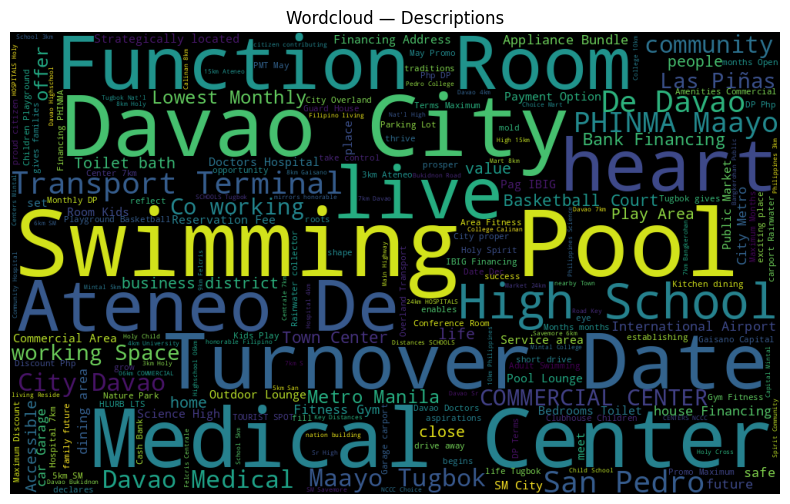

In [20]:
text = " ".join(df['description'].astype(str).tolist())

wc = WordCloud(width=1000, height=600).generate(text)

plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud — Descriptions")
plt.show()


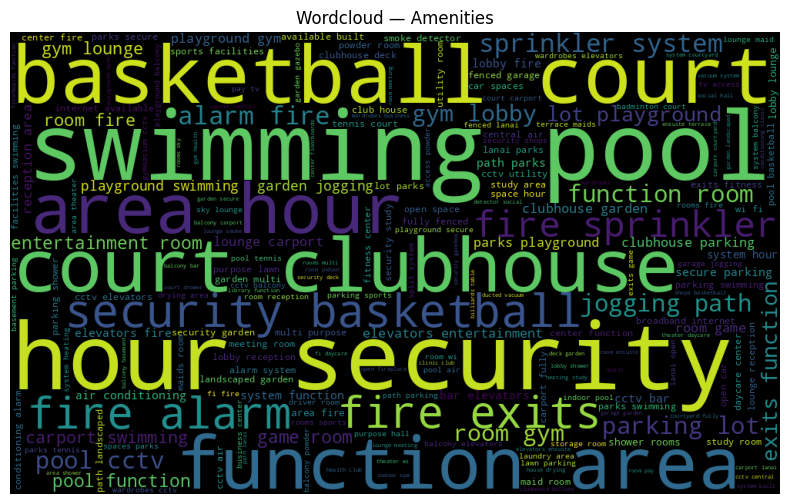

In [21]:
amen_text = " ".join([" ".join(a) for a in df['amenities_parsed']])

wc2 = WordCloud(width=1000, height=600).generate(amen_text)

plt.imshow(wc2)
plt.axis("off")
plt.title("Wordcloud — Amenities")
plt.show()


In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print("Outliers:", outliers.shape[0])


Outliers: 146


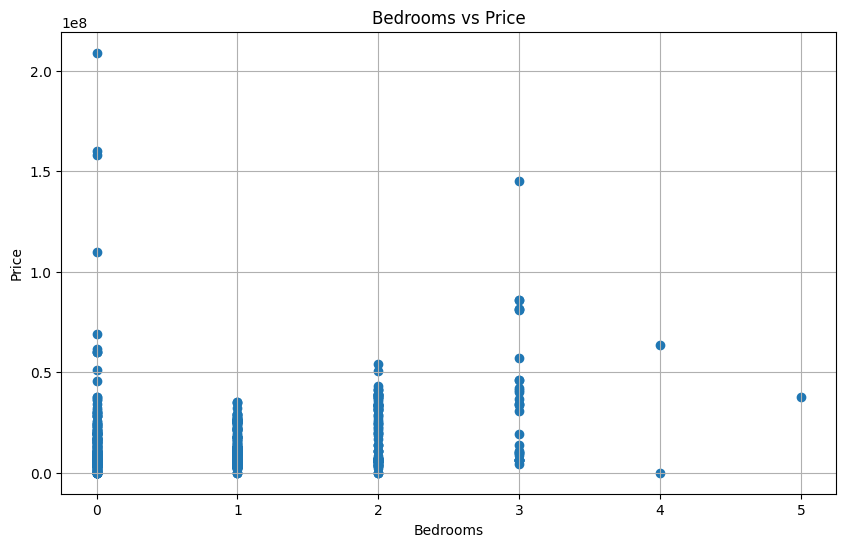

In [25]:
plt.scatter(df['num_of_bedrooms'], df['price'])
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


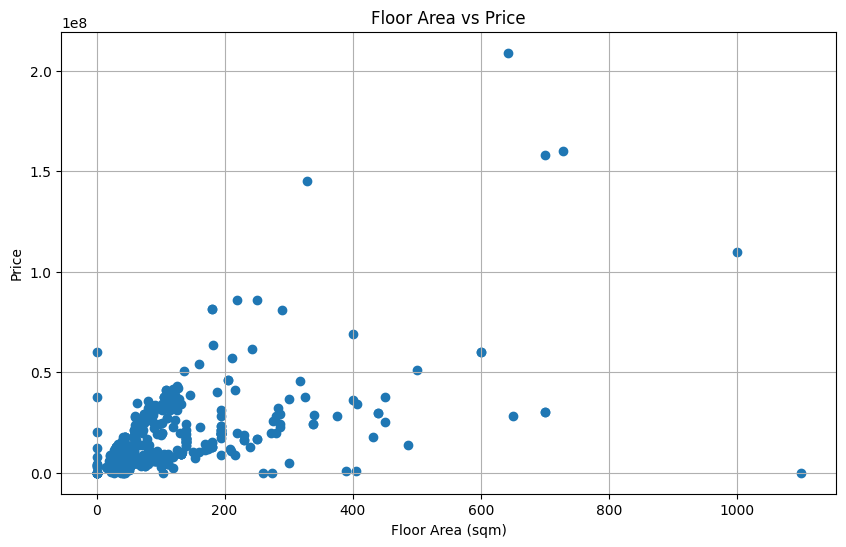

In [26]:
plt.scatter(df['floor_area'], df['price'])
plt.title("Floor Area vs Price")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Price")
plt.show()


In [27]:
print("==== BASIC SUMMARY ====")
print("Listings:", len(df))
print("Cities:", df['city'].nunique())
print("Avg price:", df['price'].mean())
print("Median price:", df['price'].median())
print("Avg description length:", df['description_length'].mean())
print("Avg amenities:", df['amenity_count'].mean())
print("Avg images:", df['num_images'].mean())


==== BASIC SUMMARY ====
Listings: 1000
Cities: 60
Avg price: 11608559.33
Median price: 6806380.0
Avg description length: 1801.749
Avg amenities: 15.672
Avg images: 0.0


In [29]:
image_base_path = "../data/raw/Real Estate Property Dataset/Images/Lamudi Images/exif/"

missing = []

for imgs in df['local_images']:
    try:
        filenames = ast.literal_eval(imgs)
        for img in filenames:
            full_path = os.path.join(image_base_path, img)
            if not os.path.exists(full_path):
                missing.append(img)
    except:
        continue

print("Missing images:", len(missing))
missing[:10]


Missing images: 0


[]

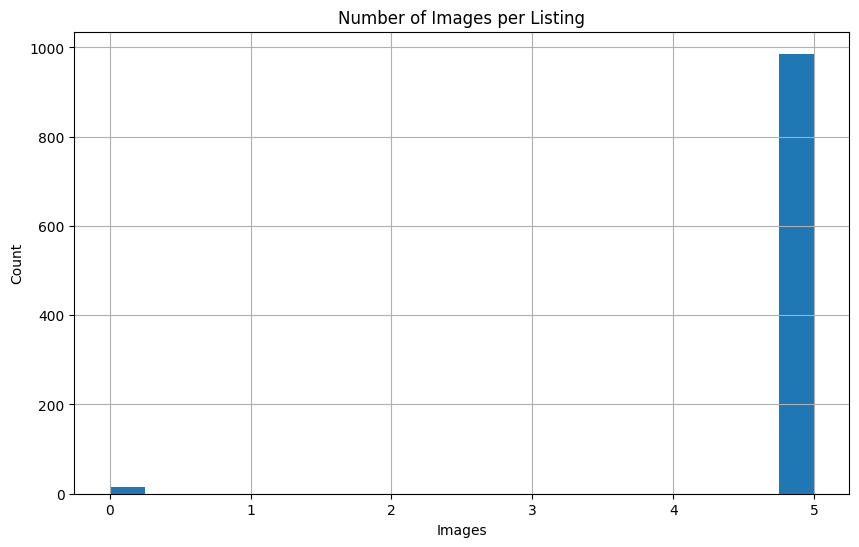

In [30]:
import ast

def count_images(x):
    try:
        lst = ast.literal_eval(x)
        return len(lst)
    except:
        return 0

df['num_images'] = df['local_images'].apply(count_images)

plt.hist(df['num_images'], bins=20)
plt.title("Number of Images per Listing")
plt.xlabel("Images")
plt.ylabel("Count")
plt.show()


In [31]:
output_path = '../data/processed/lamudi_final_clean.csv'
df.to_csv(output_path, index=False)

print("Saved final clean dataset →", output_path)


Saved final clean dataset → ../data/processed/lamudi_final_clean.csv


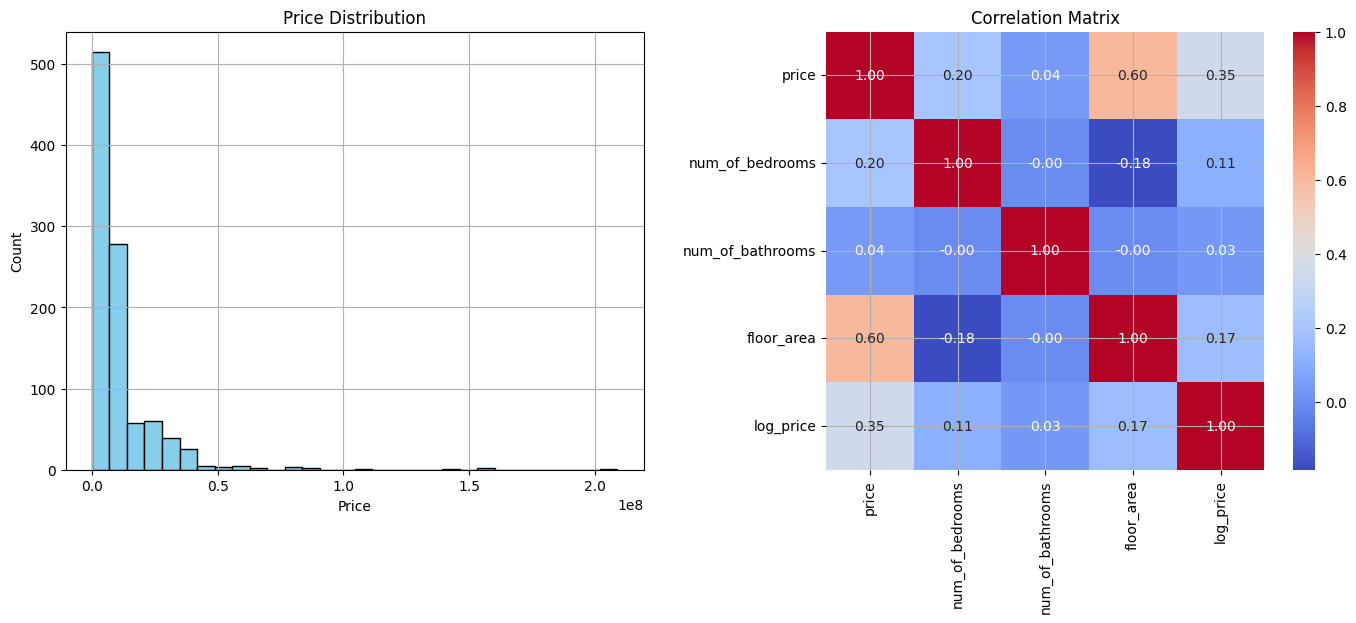

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns + log price
numeric_for_corr = numeric_cols + ['log_price']

corr = df[numeric_for_corr].corr()

plt.figure(figsize=(14, 6))

# ----------- Plot 1: Price Distribution ----------- #
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

# ----------- Plot 2: Correlation Matrix ----------- #
plt.subplot(1, 2, 2)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()


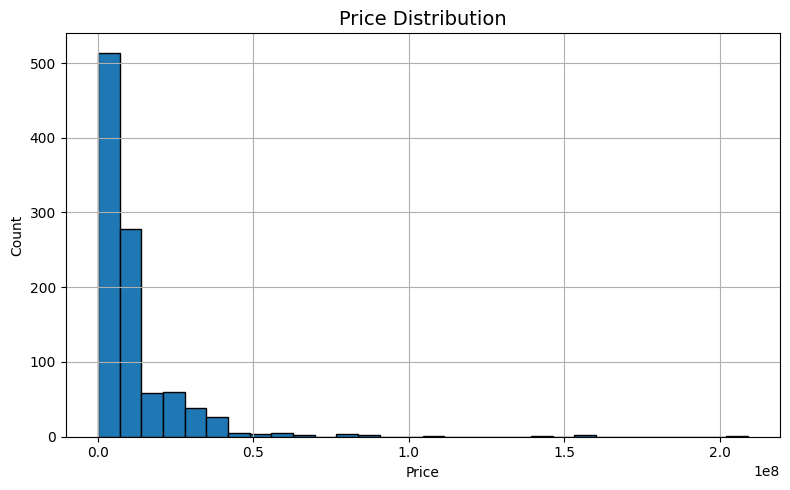

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=30, color="#1f77b4", edgecolor="black")
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../results/figures/price_distribution.png", dpi=300)
plt.show()


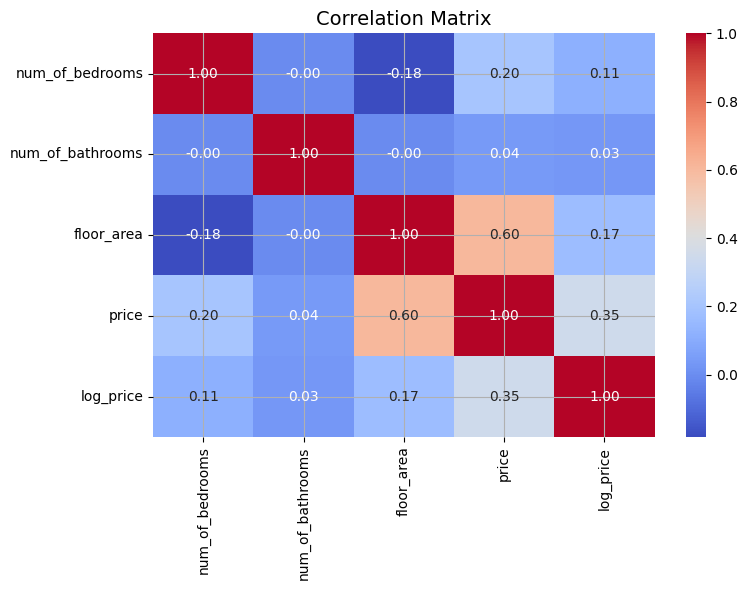

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["num_of_bedrooms", "num_of_bathrooms", "floor_area", "price", "log_price"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()

plt.savefig("../results/figures/correlation_matrix.png", dpi=300)
plt.show()


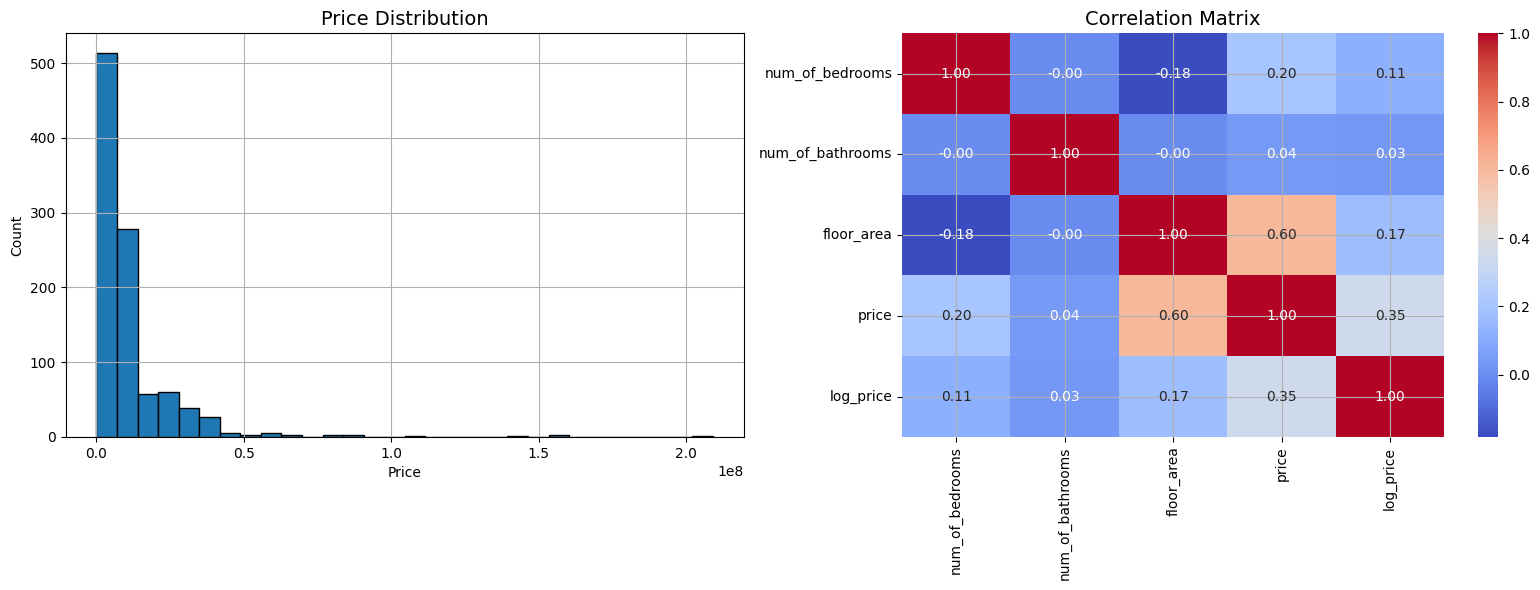

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ---- Price Histogram ----
axes[0].hist(df["price"], bins=30, color="#1f77b4", edgecolor="black")
axes[0].set_title("Price Distribution", fontsize=14)
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

# ---- Correlation Matrix ----
numeric_cols = ["num_of_bedrooms", "num_of_bathrooms", "floor_area", "price", "log_price"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix", fontsize=14)

plt.tight_layout()
plt.savefig("../results/figures/combined_price_corr.png", dpi=300)
plt.show()
